# Importando base de dados para an√°lise


In [1]:
import pandas as pd
import os
import warnings

C:\Users\victo\AppData\Local\Temp\ipykernel_10776\4046037109.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Diret√≥rio formatado como raw string (r antes da string)
diretorio = r"C:\Users\victo\Documents\qualidade ar projeto"

# Lista para armazenar DataFrames
lista_dataFrames = []
lista_nome = []

# Iterar sobre os arquivos no diret√≥rio
for arq in os.listdir(diretorio):
    if arq.endswith(".csv"):  
        nome_arquivo = "\\" + arq  # Construindo o caminho completo
        caminho_completo = diretorio + nome_arquivo
        nome_df = pd.read_csv(caminho_completo, sep=',', encoding='latin-1')  # Carregar CSV
        print("Nome do arquivo: ", arq)
        lista_dataFrames.append(nome_df)  # Adicionar DataFrame √† lista


Nome do arquivo:  IQAir_compazariano_01Nov24-01Dec24_minutely.csv
Nome do arquivo:  IQAir_compazeduardo_01Nov24-01Dec24_minutely.csv
Nome do arquivo:  IQAir_CVA_01Nov24-01Dec24_minutely.csv


In [3]:
# Quantidade de itens na lista
len(lista_dataFrames)

3

In [3]:
# Concatenando os arquivos em um √∫nico DataFrame
contador = 1
df_concatenado = lista_dataFrames[0]
for i in lista_dataFrames[1:]:
    df_concatenado = pd.concat([df_concatenado, lista_dataFrames[contador]])
    contador += 1  

In [4]:
pd.set_option('display.max_columns', None)
df_concatenado

Source                  Timezone       Datetime_start  \
0      orew7oys376  America/Recife UTC-03:00  2024-11-01 00:00:00   
1      orew7oys376  America/Recife UTC-03:00  2024-11-01 00:01:00   
2      orew7oys376  America/Recife UTC-03:00  2024-11-01 00:02:00   
3      orew7oys376  America/Recife UTC-03:00  2024-11-01 00:03:00   
4      orew7oys376  America/Recife UTC-03:00  2024-11-01 00:04:00   
...            ...                       ...                  ...   
41799  i2tns66k5l5  America/Recife UTC-03:00  2024-11-30 23:55:00   
41800  i2tns66k5l5  America/Recife UTC-03:00  2024-11-30 23:56:00   
41801  i2tns66k5l5  America/Recife UTC-03:00  2024-11-30 23:57:00   
41802  i2tns66k5l5  America/Recife UTC-03:00  2024-11-30 23:58:00   
41803  i2tns66k5l5  America/Recife UTC-03:00  2024-11-30 23:59:00   

              Datetime_end  AQI US  AQI CN  PM2.5 (ug/m3)  PM10 (ug/m3)  \
0      2024-11-01 00:00:59      19       5            3.5           6.5   
1      2024-11-01 00:01:59      17       4            3.0           5.5   
2      2024-11-01 00:02:59      14       4            2.5           5.0   
3      2024-11-01 00:03:59      19       5            3.5           6.5   
4      2024-11-01 00:04:59      19       5            3.5           7.0   
...                    ...     ...     ...            ...           ...   
41799  2024-11-30 23:55:59      33       9            6.0          16.0   
41800  2024-11-30 23:56:59      39      10            7.0          16.0   
41801  2024-11-30 23:57:59      33       9            6.0          16.0   
41802  2024-11-30 23:58:59      33       9            6.0          15.0   
41803  2024-11-30 23:59:59      33       9            6.0          14.0   

       PM1 (ug/m3)  CO2 (ppm)  CO (ppm)  TVOC (index)  NOx (index)  \
0              2.0        401       NaN           NaN          NaN   
1              2.0        401       NaN           NaN          NaN   
2              2.0        401       NaN           NaN          NaN   
3              2.0        400       NaN           NaN          NaN   
4              2.0        401       NaN           NaN          NaN   
...            ...        ...       ...           ...          ...   
41799          2.0        404       NaN           NaN          NaN   
41800          2.0        403       NaN           NaN          NaN   
41801          2.0        403       NaN           NaN          NaN   
41802          2.0        403       NaN           NaN          NaN   
41803          2.0        403       NaN           NaN          NaN   

       O3 (ug/m3)  Temperature (Celsius)  Temperature (Fahrenheit)  \
0             NaN                   26.3                      79.3   
1             NaN                   26.3                      79.3   
2             NaN                   26.4                      79.5   
3             NaN                   26.6                      79.9   
4             NaN                   26.6                      79.9   
...           ...                    ...                       ...   
41799         NaN                   26.7                      80.1   
41800         NaN                   26.8                      80.2   
41801         NaN                   26.7                      80.1   
41802         NaN                   26.7                      80.1   
41803         NaN                   26.7                      80.1   

       Humidity (%)  Outdoor PM2.5 (ug/m3)  HCHO (ppb)  TVOC (ppb)  \
0                75                    NaN         NaN         NaN   
1                75                    NaN         NaN         NaN   
2                75                    NaN         NaN         NaN   
3                75                    NaN         NaN         NaN   
4                75                    NaN         NaN         NaN   
...             ...                    ...         ...         ...   
41799            76                    NaN         NaN         NaN   
41800            75                    N

In [5]:
df_concatenado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 126233 entries, 0 to 41803
Data columns (total 59 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Source                    126233 non-null  object 
 1   Timezone                  126233 non-null  object 
 2   Datetime_start            126233 non-null  object 
 3   Datetime_end              126233 non-null  object 
 4   AQI US                    126233 non-null  int64  
 5   AQI CN                    126233 non-null  int64  
 6   PM2.5 (ug/m3)             126233 non-null  float64
 7   PM10 (ug/m3)              126233 non-null  float64
 8   PM1 (ug/m3)               126233 non-null  float64
 9   CO2 (ppm)                 126233 non-null  int64  
 10  CO (ppm)                  0 non-null       float64
 11  TVOC (index)              0 non-null       float64
 12  NOx (index)               0 non-null       float64
 13  O3 (ug/m3)                0 non-null       float64

In [ ]:
#df_concatenado.to_csv('df_concatenado.csv', index=False)


In [7]:
# Contar o n√∫mero de valores nulos em cada coluna
nulos_por_coluna = df_concatenado.isnull().sum().sort_values(ascending=False)
print(nulos_por_coluna)


slot.1.hcho                 126233
slot.1.pm10                 126233
slot.1.pc                   126233
slot.1.voc                  126233
slot.1.o3                   126233
slot.1.co                   126233
slot.2.co2                  126233
slot.2.voc                  126233
slot.2.hcho                 126233
slot.2.o3                   126233
slot.2.co                   126233
slot.3.pm1                  126233
slot.3.pm10                 126233
slot.3.pm25                 126233
slot.3.pc                   126233
slot.3.voc                  126233
slot.3.hcho                 126233
slot.3.o3                   126233
slot.3.co                   126233
slot.4.co2                  126233
slot.4.voc                  126233
slot.4.hcho                 126233
slot.4.o3                   126233
slot.1.pm25                 126233
slot.4.co                   126233
slot.1.pm1                  126233
HCHO (ppb)                  126233
CO (ppm)                    126233
TVOC (index)        

In [8]:
# Filtrar colunas com valores nulos maiores ou igual que 0
limite = 0
df_filtrado = df_concatenado.loc[:, df_concatenado.isnull().sum() <= limite]

print(f"Dimens√£o original: {df_concatenado.shape}")
print(f"Dimens√£o ap√≥s filtro: {df_filtrado.shape}")


Dimens√£o original: (126233, 59)
Dimens√£o ap√≥s filtro: (126233, 23)


In [9]:
display(df_filtrado)

Source                  Timezone       Datetime_start  \
0      orew7oys376  America/Recife UTC-03:00  2024-11-01 00:00:00   
1      orew7oys376  America/Recife UTC-03:00  2024-11-01 00:01:00   
2      orew7oys376  America/Recife UTC-03:00  2024-11-01 00:02:00   
3      orew7oys376  America/Recife UTC-03:00  2024-11-01 00:03:00   
4      orew7oys376  America/Recife UTC-03:00  2024-11-01 00:04:00   
...            ...                       ...                  ...   
41799  i2tns66k5l5  America/Recife UTC-03:00  2024-11-30 23:55:00   
41800  i2tns66k5l5  America/Recife UTC-03:00  2024-11-30 23:56:00   
41801  i2tns66k5l5  America/Recife UTC-03:00  2024-11-30 23:57:00   
41802  i2tns66k5l5  America/Recife UTC-03:00  2024-11-30 23:58:00   
41803  i2tns66k5l5  America/Recife UTC-03:00  2024-11-30 23:59:00   

              Datetime_end  AQI US  AQI CN  PM2.5 (ug/m3)  PM10 (ug/m3)  \
0      2024-11-01 00:00:59      19       5            3.5           6.5   
1      2024-11-01 00:01:59      17       4            3.0           5.5   
2      2024-11-01 00:02:59      14       4            2.5           5.0   
3      2024-11-01 00:03:59      19       5            3.5           6.5   
4      2024-11-01 00:04:59      19       5            3.5           7.0   
...                    ...     ...     ...            ...           ...   
41799  2024-11-30 23:55:59      33       9            6.0          16.0   
41800  2024-11-30 23:56:59      39      10            7.0          16.0   
41801  2024-11-30 23:57:59      33       9            6.0          16.0   
41802  2024-11-30 23:58:59      33       9            6.0          15.0   
41803  2024-11-30 23:59:59      33       9            6.0          14.0   

       PM1 (ug/m3)  CO2 (ppm)  Temperature (Celsius)  \
0              2.0        401                   26.3   
1              2.0        401                   26.3   
2              2.0        401                   26.4   
3              2.0        400                   26.6   
4              2.0        401                   26.6   
...            ...        ...                    ...   
41799          2.0        404                   26.7   
41800          2.0        403                   26.8   
41801          2.0        403                   26.7   
41802          2.0        403                   26.7   
41803          2.0        403                   26.7   

       Temperature (Fahrenheit)  Humidity (%)  Pressure (pascal)  \
0                          79.3            75             101202   
1                          79.3            75             101200   
2                          79.5            75             101196   
3                          79.9            75             101195   
4                          79.9            75             101203   
...                         ...           ...                ...   
41799                      80.1            76             101230   
41800                      80.2            75             101227   
41801                      80.1            75             101230   
41802                      80.1            75             101225   
41803                      80.1            75             101222   

       Particle Count  slot.2.pm1  slot.2.pm10  slot.2.pm25  slot.2.pc  \
0               267.0           2            5            3        234   
1               265.0           2            3            2        242   
2               246.5           2            3            2        207   
3               257.5           2            6            3        226   
4               250.0           2            8            4        234   
...               ...         ...          ...          ...        ...   
41799           251.0           2           14            5        232   
41800           277.0           2           18            7        275   
41801           242.0           2           20            7        245   
41802           259.0           2           16      

In [10]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 126233 entries, 0 to 41803
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Source                    126233 non-null  object 
 1   Timezone                  126233 non-null  object 
 2   Datetime_start            126233 non-null  object 
 3   Datetime_end              126233 non-null  object 
 4   AQI US                    126233 non-null  int64  
 5   AQI CN                    126233 non-null  int64  
 6   PM2.5 (ug/m3)             126233 non-null  float64
 7   PM10 (ug/m3)              126233 non-null  float64
 8   PM1 (ug/m3)               126233 non-null  float64
 9   CO2 (ppm)                 126233 non-null  int64  
 10  Temperature (Celsius)     126233 non-null  float64
 11  Temperature (Fahrenheit)  126233 non-null  float64
 12  Humidity (%)              126233 non-null  int64  
 13  Pressure (pascal)         126233 non-null  int64  

In [11]:
display(df_filtrado['Timezone'].unique())

array(['America/Recife UTC-03:00'], dtype=object)

In [12]:
display(df_filtrado['AQI US'].unique())

array([ 19,  17,  14,  22,  25,  28,  44,  33,  36,  31,  11,  69,  42,
        47,  39,  52,  50,  53,  54,  58,   8,   6,  55,  77,  60,  66,
       102, 157, 110,  95,  57,  56,  59,  61,   3,  62,  71,  63,  67,
        72,  84,  85,  94,  82,  83,  73,  68, 106,  65,  91,  96,  70,
        64,  74,  75,  81,  87,  92,  78,  80,  86,  76,  79, 115, 112,
       107, 170, 152, 118, 129, 134, 121,  89, 128, 167, 172, 171, 165,
       168, 159, 139, 119, 117, 105,  99, 103,  90, 123, 143, 111,  93,
         0,  88, 153, 179, 203, 192, 147, 175, 155, 144, 158, 169, 164,
       151, 127, 160, 124,  97, 162, 154, 122, 149, 132, 181, 186, 174,
       177,  98, 101, 116, 166, 180, 161, 131, 142, 108, 184, 173, 126,
       156, 208, 201, 234, 310, 385, 423, 389, 334, 257, 290, 259, 202,
       163, 226, 281, 402, 350, 279, 248, 241, 245, 405, 426, 392, 331,
       409, 435, 404, 300, 269, 251, 227, 249, 244, 235, 220, 297, 346,
       266, 224, 223, 209, 196, 199, 210, 197, 191, 225, 230, 18

# An√°lise das correla√ß√µes das colunas de PM25

In [13]:

# Selecionar apenas as colunas relevantes para an√°lise
pm25_columns = ["PM2.5 (ug/m3)", "slot.2.pm25", "slot.4.pm25"]

# Criar um DataFrame apenas com as colunas de interesse
df_pm25 = df_filtrado[pm25_columns].copy()

# Calcular a m√©dia dos slots 2 e 4
df_pm25["PM2.5_calculated"] = (df_pm25["slot.2.pm25"] + df_pm25["slot.4.pm25"]) / 2

# Calcular a correla√ß√£o entre o PM2.5 original e o valor calculado
calculated_correlation = df_pm25[["PM2.5 (ug/m3)", "PM2.5_calculated"]].corr().iloc[0, 1]

# Adicionar a diferen√ßa entre o valor original e o calculado
df_pm25["Difference"] = df_pm25["PM2.5 (ug/m3)"] - df_pm25["PM2.5_calculated"]

# Estat√≠sticas descritivas das diferen√ßas
difference_stats = df_pm25["Difference"].describe()

# Contar quantos casos t√™m diferen√ßa maior que 0.1 ¬µg/m¬≥
num_large_differences = (df_pm25["Difference"].abs() > 0.1).sum()

# Exibir estat√≠sticas e alguns exemplos onde h√° diferen√ßa significativa
display(difference_stats, num_large_differences, df_pm25[df_pm25["Difference"].abs() > 0.1].head())


count    126233.000000
mean          0.090634
std           0.192621
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           0.500000
Name: Difference, dtype: float64

22882

PM2.5 (ug/m3)  slot.2.pm25  slot.4.pm25  PM2.5_calculated  Difference
26519            8.0            8            7               7.5         0.5
26520            8.0            7            8               7.5         0.5
26523            7.0            7            6               6.5         0.5
26525            9.0            9            8               8.5         0.5
26528           12.0           12           11              11.5         0.5

### Interpreta√ß√µes sobre colunas de PM25

- O menor valor da diferen√ßa √© 0, o que significa que h√° medi√ß√µes onde "PM2.5 (ug/m3)" e a m√©dia dos slots s√£o id√™nticos.
- O maior valor da diferen√ßa foi 0.5 ¬µg/m¬≥, o que indica que, no m√°ximo, "PM2.5 (ug/m3)" foi ajustado em 0.5 ¬µg/m¬≥ acima ou abaixo da m√©dia dos slots.
- 25% (Primeiro Quartil) = 0.0 ‚Üí 25% dos valores t√™m uma diferen√ßa de 0.
- 50% (Mediana) = 0.0 ‚Üí Metade dos valores t√™m uma diferen√ßa de 0.
- 75% (Terceiro Quartil) = 0.0 ‚Üí 75% dos valores t√™m uma diferen√ßa de 0.
- Isso significa que a maioria das medi√ß√µes seguem exatamente a m√©dia dos slots.
- Existem 22.882 registros onde a diferen√ßa entre "PM2.5 (ug/m3)" e a m√©dia dos slots 2 e 4 foi maior que 0.1 ¬µg/m¬≥.
- Isso representa ~18,1% do total de medi√ß√µes.
- Esses casos indicam momentos onde houve ajustes ou pequenas varia√ß√µes no c√°lculo.

#### Conclus√µes

- A maioria das medi√ß√µes (cerca de 82%) segue exatamente a m√©dia aritm√©tica de slot.2.pm25 e slot.4.pm25.
- Em ~18% dos casos, h√° um ajuste de at√© 0.5 ¬µg/m¬≥, que pode ser resultado de arredondamento ou corre√ß√µes feitas pelo sistema de medi√ß√£o.
- O maior ajuste observado foi de 0.5 ¬µg/m¬≥, 

In [14]:
#df_filtrado.to_csv('prochat.csv', index= False)

# Transformando dados temporais

In [15]:
import numpy as np

# Converter a coluna 'Datetime_start' para datetime
df_filtrado['Datetime_start'] = pd.to_datetime(df_filtrado['Datetime_start'])

# Extrair informa√ß√µes temporais de 'Datetime_start'
df_filtrado['Year'] = df_filtrado['Datetime_start'].dt.year                # Ano
df_filtrado['Month'] = df_filtrado['Datetime_start'].dt.month              # M√™s
df_filtrado['Day'] = df_filtrado['Datetime_start'].dt.day                  # Dia
df_filtrado['Hour'] = df_filtrado['Datetime_start'].dt.hour                # Hora
df_filtrado['Weekday'] = df_filtrado['Datetime_start'].dt.weekday # Dia da semana(OBS: Para fun√ß√£o weekday a semana vai da contagem segunda 0 ate domingo 6)
df_filtrado['Is_Weekend'] = df_filtrado['Weekday'].isin([5, 6]).astype(int) # Fim de semana

# Esta√ß√µes do ano (baseado no hemisf√©rio sul)
def get_season(month):
    if month in [12, 1, 2]:
        return 'Ver√£o'
    elif month in [3, 4, 5]:
        return 'Outono'
    elif month in [6, 7, 8]:
        return 'Inverno'
    else:
        return 'Primavera'

df_filtrado['Season'] = df_filtrado['Month'].apply(get_season)


# Visualizar as primeiras linhas
df_filtrado.head()


C:\Users\victo\AppData\Local\Temp\ipykernel_10976\2144157949.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Datetime_start'] = pd.to_datetime(df_filtrado['Datetime_start'])
C:\Users\victo\AppData\Local\Temp\ipykernel_10976\2144157949.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Year'] = df_filtrado['Datetime_start'].dt.year                # Ano
C:\Users\victo\AppData\Local\Temp\ipykernel_10976\2144157949.py:8: SettingWithCopyWarning: 
A value is trying to be set on a co

Source                  Timezone      Datetime_start  \
0  orew7oys376  America/Recife UTC-03:00 2024-11-01 00:00:00   
1  orew7oys376  America/Recife UTC-03:00 2024-11-01 00:01:00   
2  orew7oys376  America/Recife UTC-03:00 2024-11-01 00:02:00   
3  orew7oys376  America/Recife UTC-03:00 2024-11-01 00:03:00   
4  orew7oys376  America/Recife UTC-03:00 2024-11-01 00:04:00   

          Datetime_end  AQI US  AQI CN  PM2.5 (ug/m3)  PM10 (ug/m3)  \
0  2024-11-01 00:00:59      19       5            3.5           6.5   
1  2024-11-01 00:01:59      17       4            3.0           5.5   
2  2024-11-01 00:02:59      14       4            2.5           5.0   
3  2024-11-01 00:03:59      19       5            3.5           6.5   
4  2024-11-01 00:04:59      19       5            3.5           7.0   

   PM1 (ug/m3)  CO2 (ppm)  Temperature (Celsius)  Temperature (Fahrenheit)  \
0          2.0        401                   26.3                      79.3   
1          2.0        401                   26.3                      79.3   
2          2.0        401                   26.4                      79.5   
3          2.0        400                   26.6                      79.9   
4          2.0        401                   26.6                      79.9   

   Humidity (%)  Pressure (pascal)  Particle Count  slot.2.pm1  slot.2.pm10  \
0            75             101202           267.0           2            5   
1            75             101200           265.0           2            3   
2            75             101196           246.5           2            3   
3            75             101195           257.5           2            6   
4            75             101203           250.0           2            8   

   slot.2.pm25  slot.2.pc  slot.4.pm1  slot.4.pm10  slot.4.pm25  slot.4.pc  \
0            3        234           2            8            4        300   
1            2        242           2            8            4        288   
2            2        207           2            7            3        286   
3            3        226           2            7            4        289   
4            4        234           2            6            3        266   

   Year  Month  Day  Hour  Weekday  Is_Weekend     Season  
0  2024     11    1     0        4           0  Primavera  
1  2024     11    1     0        4           0  Primavera  
2  2024     11    1     0        4           0  Primavera  
3  2024     11    1     0        4           0  Primavera  
4  2024     11    1     0        4           0  Primavera

# Dropando colunas e falando o motivo
- Colunas de datetime e timezone dropadas por serem redundantes, e tamb√©m pela divis√£o da coluna Datetime_start
- Remo√ß√£o dos slots 4 de pm25, pm10, pm1, pc para usar apenas 1 slot de cada
- Remo√ß√£o de AQI CN por ser redundante em rela√ß√£o ao target
- Remo√ß√£o de colunas de m√©dia de slots, seguindo mesma l√≥gica da an√°lise das colunas de PM25

In [16]:
# Remover as colunas 
df_filtrado = df_filtrado.drop(['Datetime_start', 'Datetime_end','Timezone','Temperature (Fahrenheit)', 'AQI CN',"PM2.5 (ug/m3)",'PM10 (ug/m3)', 'PM1 (ug/m3)','slot.4.pm1','slot.4.pm10','slot.4.pm25','Particle Count','slot.4.pc'], axis=1)
df_filtrado.head()


Source  AQI US  CO2 (ppm)  Temperature (Celsius)  Humidity (%)  \
0  orew7oys376      19        401                   26.3            75   
1  orew7oys376      17        401                   26.3            75   
2  orew7oys376      14        401                   26.4            75   
3  orew7oys376      19        400                   26.6            75   
4  orew7oys376      19        401                   26.6            75   

   Pressure (pascal)  slot.2.pm1  slot.2.pm10  slot.2.pm25  slot.2.pc  Year  \
0             101202           2            5            3        234  2024   
1             101200           2            3            2        242  2024   
2             101196           2            3            2        207  2024   
3             101195           2            6            3        226  2024   
4             101203           2            8            4        234  2024   

   Month  Day  Hour  Weekday  Is_Weekend     Season  
0     11    1     0        4           0  Primavera  
1     11    1     0        4           0  Primavera  
2     11    1     0        4           0  Primavera  
3     11    1     0        4           0  Primavera  
4     11    1     0        4           0  Primavera

In [17]:
df_filtrado.info()
df_filtrado['Season'].unique()

<class 'pandas.core.frame.DataFrame'>
Index: 126233 entries, 0 to 41803
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Source                 126233 non-null  object 
 1   AQI US                 126233 non-null  int64  
 2   CO2 (ppm)              126233 non-null  int64  
 3   Temperature (Celsius)  126233 non-null  float64
 4   Humidity (%)           126233 non-null  int64  
 5   Pressure (pascal)      126233 non-null  int64  
 6   slot.2.pm1             126233 non-null  int64  
 7   slot.2.pm10            126233 non-null  int64  
 8   slot.2.pm25            126233 non-null  int64  
 9   slot.2.pc              126233 non-null  int64  
 10  Year                   126233 non-null  int32  
 11  Month                  126233 non-null  int32  
 12  Day                    126233 non-null  int32  
 13  Hour                   126233 non-null  int32  
 14  Weekday                126233 non-null  in

array(['Primavera'], dtype=object)

In [18]:
from sklearn.preprocessing import LabelEncoder
# Instanciando o LabelEncoder
label_encoder = LabelEncoder()

# Transformando as colunas de categorias em n√∫meros
df_filtrado['Season'] = label_encoder.fit_transform(df_filtrado['Season'])
df_filtrado['Source'] = label_encoder.fit_transform(df_filtrado['Source'])

df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 126233 entries, 0 to 41803
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Source                 126233 non-null  int32  
 1   AQI US                 126233 non-null  int64  
 2   CO2 (ppm)              126233 non-null  int64  
 3   Temperature (Celsius)  126233 non-null  float64
 4   Humidity (%)           126233 non-null  int64  
 5   Pressure (pascal)      126233 non-null  int64  
 6   slot.2.pm1             126233 non-null  int64  
 7   slot.2.pm10            126233 non-null  int64  
 8   slot.2.pm25            126233 non-null  int64  
 9   slot.2.pc              126233 non-null  int64  
 10  Year                   126233 non-null  int32  
 11  Month                  126233 non-null  int32  
 12  Day                    126233 non-null  int32  
 13  Hour                   126233 non-null  int32  
 14  Weekday                126233 non-null  in

In [19]:
df_filtrado.tail(10)

Source  AQI US  CO2 (ppm)  Temperature (Celsius)  Humidity (%)  \
41794       0      50        405                   26.6            76   
41795       0      44        405                   26.6            76   
41796       0      44        406                   26.6            76   
41797       0      50        407                   26.6            76   
41798       0      44        407                   26.6            76   
41799       0      33        404                   26.7            76   
41800       0      39        403                   26.8            75   
41801       0      33        403                   26.7            75   
41802       0      33        403                   26.7            75   
41803       0      33        403                   26.7            75   

       Pressure (pascal)  slot.2.pm1  slot.2.pm10  slot.2.pm25  slot.2.pc  \
41794             101229           3           23            8        440   
41795             101229           2           18            7        365   
41796             101229           3           17            7        379   
41797             101233           2           24            9        317   
41798             101224           2           23            8        279   
41799             101230           2           14            5        232   
41800             101227           2           18            7        275   
41801             101230           2           20            7        245   
41802             101225           2           16            6        257   
41803             101222           2           14            5        247   

       Year  Month  Day  Hour  Weekday  Is_Weekend  Season  
41794  2024     11   30    23        5           1       0  
41795  2024     11   30    23        5           1       0  
41796  2024     11   30    23        5           1       0  
41797  2024     11   30    23        5           1       0  
41798  2024     11   30    23        5           1       0  
41799  2024     11   30    23        5           1       0  
41800  2024     11   30    23        5           1       0  
41801  2024     11   30    23        5           1       0  
41802  2024     11   30    23        5           1       0  
41803  2024     11   30    23        5           1       0

In [20]:
# Features
X = df_filtrado.drop('AQI US',axis=1)

# Target(alvo)

y = df_filtrado['AQI US']

# Testando modelos
* RF
* XGBoost
* KNN
* MLP
* LightGBM

# Random Forest

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict
import numpy as np

# Criar o modelo
model = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)

# Obter previs√µes com valida√ß√£o cruzada
y_predict = cross_val_predict(model, X, y, cv=10)

# Calcular m√©tricas
r2_scores = cross_val_score(model, X, y, cv=10, scoring='r2')
mse_scores = cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')
mae_scores = cross_val_score(model, X, y, cv=10, scoring='neg_mean_absolute_error')

# Resultados
print(f"M√©dia do R¬≤: {np.mean(r2_scores):.4f}")
print(f"M√©dia do MSE: {-np.mean(mse_scores):.4f}")  # Inverte o sinal do MSE
print(f"M√©dia do MAE: {-np.mean(mae_scores):.4f}")  # Inverte o sinal do MAE


M√©dia do R¬≤: 0.8737
M√©dia do MSE: 18.0462
M√©dia do MAE: 2.6293


## Testando hiperparametros

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV

# Separar 80% treino e 20% teste antes da otimiza√ß√£o de hiperpar√¢metros
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defini√ß√£o do modelo
model = RandomForestRegressor(random_state=42)

# Defini√ß√£o do espa√ßo de busca dos hiperpar√¢metros
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# RandomizedSearchCV com valida√ß√£o cruzada apenas no treino
random_search = RandomizedSearchCV(
    model,
    param_distributions=param_grid,
    n_iter=20,          # N√∫mero de combina√ß√µes a testar
    scoring='r2',       # Otimizar R¬≤
    cv=10,              # Valida√ß√£o cruzada s√≥ no treino
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Executar a busca de hiperpar√¢metros apenas no conjunto de treino
random_search.fit(X_train, y_train)

# Melhor combina√ß√£o encontrada
best_params = random_search.best_params_
print("Melhores hiperpar√¢metros:", best_params)


Fitting 10 folds for each of 20 candidates, totalling 200 fits


C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
28 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-pac

Melhores hiperpar√¢metros: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20}


## Modelo otimizado

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Criar o modelo com os melhores hiperpar√¢metros encontrados
best_model = RandomForestRegressor(
    n_estimators=100, 
    min_samples_split=2, 
    min_samples_leaf=1, 
    max_features='log2', 
    max_depth=20,
)

# Treinar apenas no conjunto de treino
best_model.fit(X_train, y_train)

# Fazer previs√µes no conjunto de teste
y_pred = best_model.predict(X_test)

# Avaliar o modelo no conjunto de teste
r2_test = best_model.score(X_test, y_test)
mse_test = mean_squared_error(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)

# Exibir resultados
print(f"R¬≤ no conjunto de teste: {r2_test:.4f}")
print(f"MSE no conjunto de teste: {mse_test:.4f}")
print(f"MAE no conjunto de teste: {mae_test:.4f}")


R¬≤ no conjunto de teste: 0.9807
MSE no conjunto de teste: 6.9473
MAE no conjunto de teste: 1.6292


C:\Users\victo\AppData\Local\Temp\ipykernel_20024\1063783958.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Import√¢ncia', y='Feature', data=importancia_features, palette='viridis')


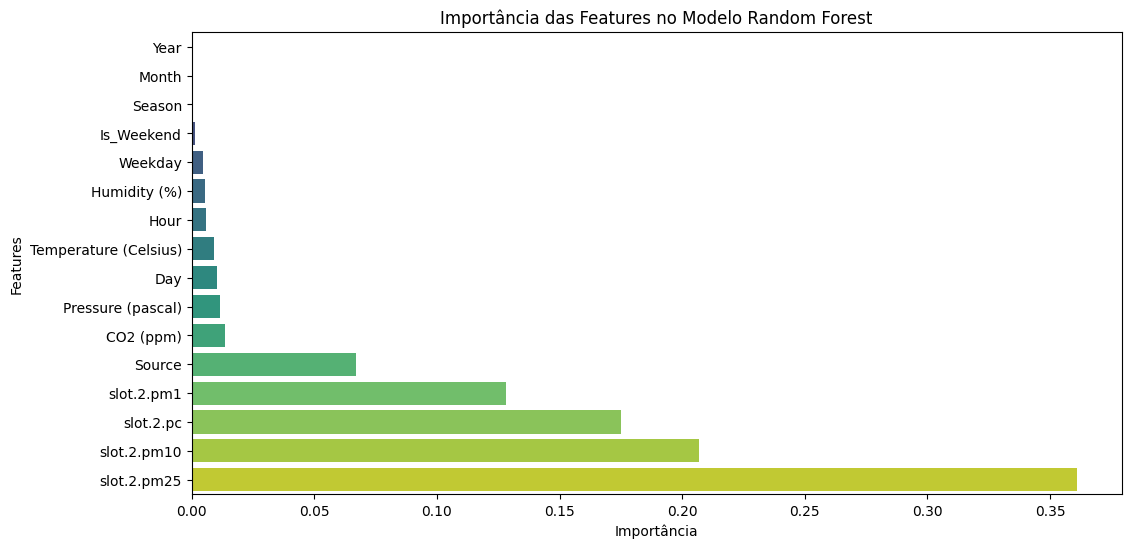

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Criar e treinar o modelo Random Forest
model = RandomForestRegressor(
    n_estimators=200,
    max_depth=20,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt'
)

model.fit(X, y)  # Treina o modelo

# Obt√©m a import√¢ncia das features
importancia_features = pd.DataFrame({
    'Feature': X.columns,
    'Import√¢ncia': model.feature_importances_
}).sort_values(by='Import√¢ncia', ascending=True)  # Ordena de forma crescente para visualiza√ß√£o

# Plot do gr√°fico de import√¢ncia das features
plt.figure(figsize=(12, 6))
sns.barplot(x='Import√¢ncia', y='Feature', data=importancia_features, palette='viridis')
plt.title('Import√¢ncia das Features no Modelo Random Forest')
plt.xlabel('Import√¢ncia')
plt.ylabel('Features')
plt.show()


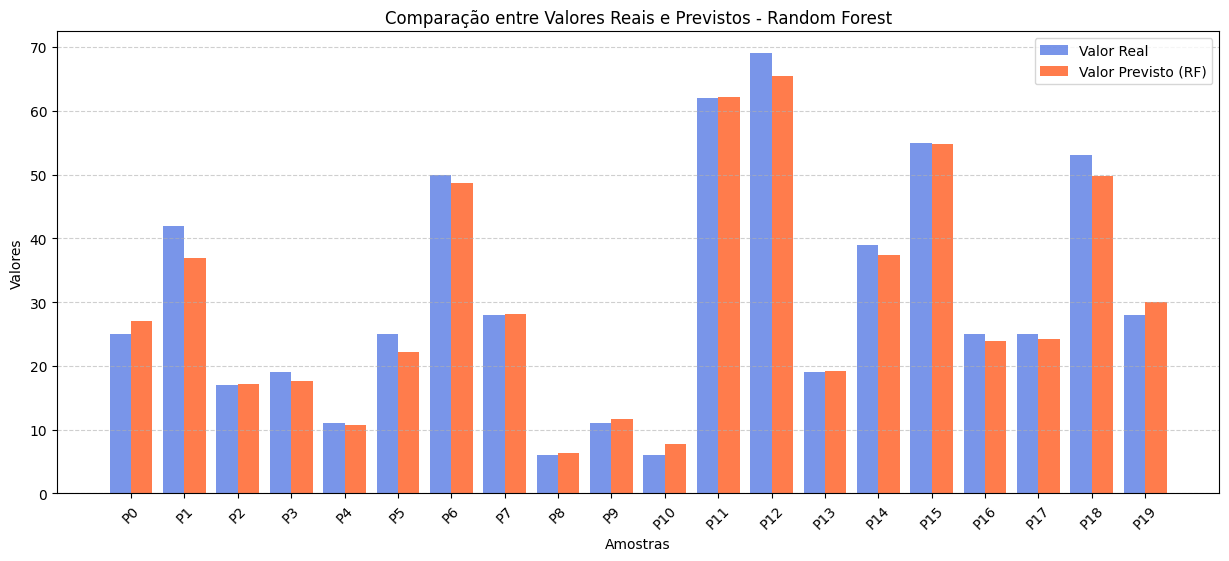

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# N√∫mero de amostras para visualiza√ß√£o
n_amostra = 20  
y_test_amostra = y_test[:n_amostra]  # Valores reais
y_pred_amostra = y_pred[:n_amostra]  # Previs√µes do modelo Random Forest

# Criando um √≠ndice para as barras
indices = np.arange(len(y_test_amostra))

plt.figure(figsize=(15, 6))

# Barras para os valores reais
plt.bar(indices - 0.2, y_test_amostra, width=0.4, label='Valor Real', color='royalblue', alpha=0.7)

# Barras para os valores previstos pelo RF
plt.bar(indices + 0.2, y_pred_amostra, width=0.4, label='Valor Previsto (RF)', color='orangered', alpha=0.7)

# Melhorando a visualiza√ß√£o
plt.xticks(indices, labels=[f'P{i}' for i in indices], rotation=45)  # R√≥tulos inclinados
plt.ylabel('Valores')
plt.xlabel('Amostras')
plt.title('Compara√ß√£o entre Valores Reais e Previstos - Random Forest')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Exibe o gr√°fico
plt.show()


# Modelo KNN

In [66]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
model = KNeighborsRegressor(n_neighbors=7)

# Obter previs√µes com valida√ß√£o cruzada
y_predict = cross_val_predict(model, X, y, cv=10)

# Calcular m√©tricas
r2_scores = cross_val_score(model, X, y, cv=10, scoring='r2')
mse_scores = cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')
mae_scores = cross_val_score(model, X, y, cv=10, scoring='neg_mean_absolute_error')

# Resultados
print(f"M√©dia do R¬≤: {np.mean(r2_scores):.4f}")
print(f"M√©dia do MSE: {-np.mean(mse_scores):.4f}")  # Inverte o sinal do MSE
print(f"M√©dia do MAE: {-np.mean(mae_scores):.4f}")  # Inverte o sinal do MAE



M√©dia do R¬≤: 0.6133
M√©dia do MSE: 65.9424
M√©dia do MAE: 5.3878


## Testando hiperparametros

In [67]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV

# Separar 80% treino e 20% teste antes de otimizar hiperpar√¢metros
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir modelo base
model = KNeighborsRegressor()

# Espa√ßo de busca dos hiperpar√¢metros
param_grid = {
    'n_neighbors': range(1, 30, 2),  # Testa vizinhos √≠mpares entre 1 e 29
    'weights': ['uniform', 'distance'],  # Peso fixo ou baseado na dist√¢ncia
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Diferentes m√©tricas de dist√¢ncia
}

# RandomizedSearchCV para busca de melhores hiperpar√¢metros
random_search = RandomizedSearchCV(
    model,
    param_distributions=param_grid,
    n_iter=20,  # N√∫mero de combina√ß√µes testadas
    scoring='r2',
    cv=10,  # Valida√ß√£o cruzada apenas no treino
    verbose=1,
    n_jobs=-1
)

# Executar a busca no conjunto de treino
random_search.fit(X_train, y_train)

# Melhor combina√ß√£o encontrada
best_params = random_search.best_params_
print("Melhores hiperpar√¢metros:", best_params)


Fitting 10 folds for each of 20 candidates, totalling 200 fits
Melhores hiperpar√¢metros: {'weights': 'distance', 'n_neighbors': 5, 'metric': 'manhattan'}


## Modelo Otimizado

In [68]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Criar modelo otimizado com os melhores par√¢metros
best_model = KNeighborsRegressor(
    n_neighbors=best_params['n_neighbors'],
    weights=best_params['weights'],
    metric=best_params['metric']
)

# Treinar apenas no conjunto de treino
best_model.fit(X_train, y_train)

# Fazer previs√µes no conjunto de teste
y_pred = best_model.predict(X_test)

# Avaliar o modelo no conjunto de teste
r2_test = best_model.score(X_test, y_test)
mse_test = mean_squared_error(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)

# Exibir resultados
print(f"R¬≤ no conjunto de teste: {r2_test:.4f}")
print(f"MSE no conjunto de teste: {mse_test:.4f}")
print(f"MAE no conjunto de teste: {mae_test:.4f}")


R¬≤ no conjunto de teste: 0.9524
MSE no conjunto de teste: 17.1509
MAE no conjunto de teste: 2.2916


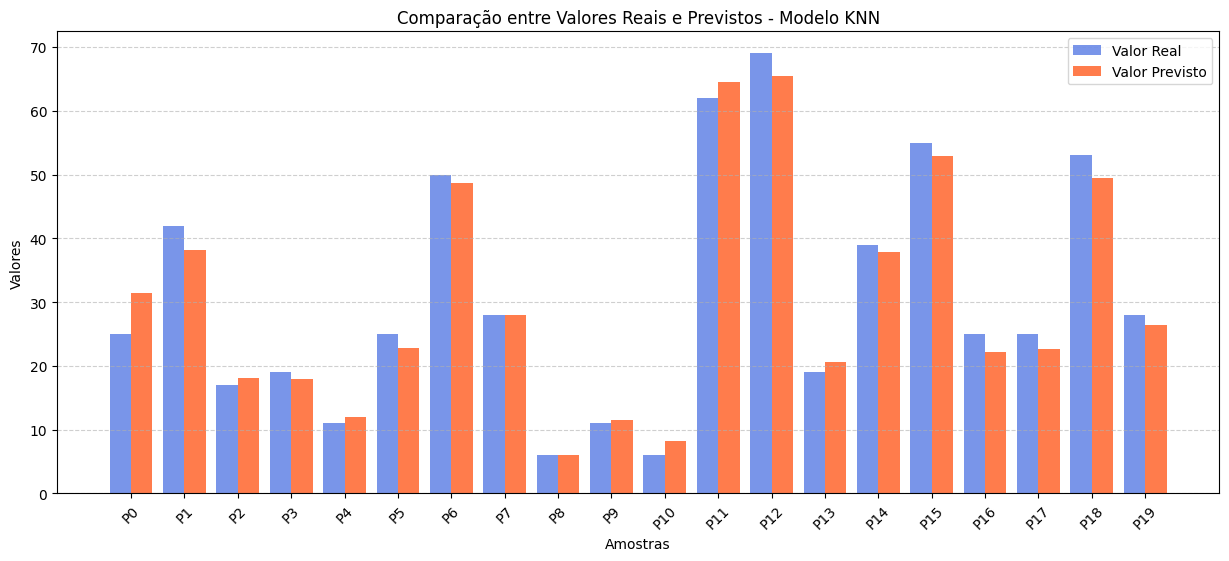

In [70]:
import matplotlib.pyplot as plt
import numpy as np

# N√∫mero de amostras para visualiza√ß√£o
n_amostra = 20  
y_test_amostra = y_test[:n_amostra]  # Corrigido para usar y_test correto
y_pred_amostra = y_pred[:n_amostra]  # Previs√µes do modelo KNN

# Criando um √≠ndice para as barras
indices = np.arange(len(y_test_amostra))

plt.figure(figsize=(15, 6))

# Barras para os valores reais
plt.bar(indices - 0.2, y_test_amostra, width=0.4, label='Valor Real', color='royalblue', alpha=0.7)

# Barras para os valores previstos
plt.bar(indices + 0.2, y_pred_amostra, width=0.4, label='Valor Previsto', color='orangered', alpha=0.7)

# Melhorando a visualiza√ß√£o
plt.xticks(indices, labels=[f'P{i}' for i in indices], rotation=45)  # R√≥tulos inclinados
plt.ylabel('Valores')
plt.xlabel('Amostras')
plt.title('Compara√ß√£o entre Valores Reais e Previstos - Modelo KNN')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Exibe o gr√°fico
plt.show()


C:\Users\victo\AppData\Local\Temp\ipykernel_19252\1967625451.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Import√¢ncia', y='Feature', data=importancia_features, palette='coolwarm')


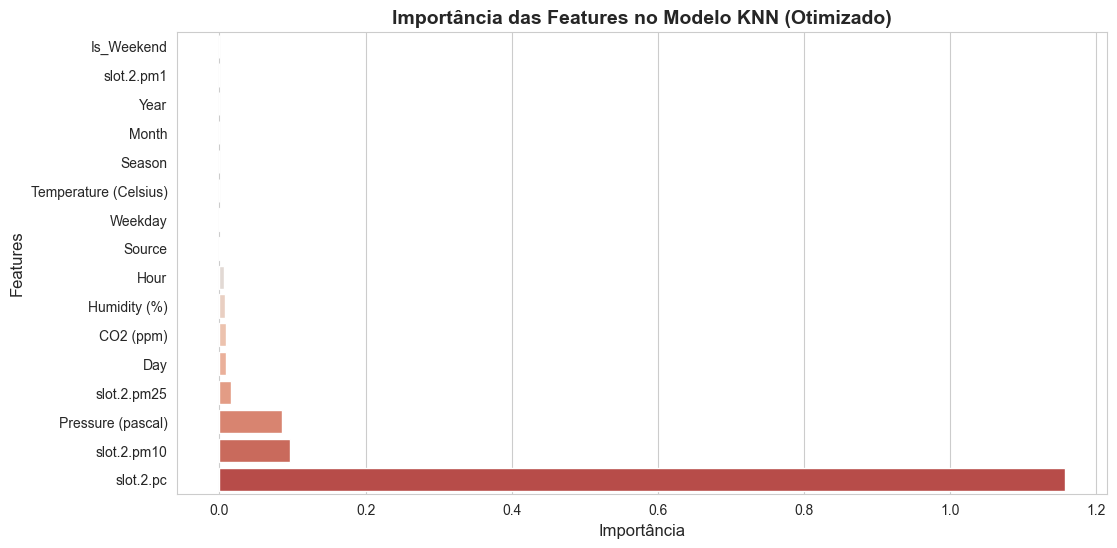

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

# Divis√£o treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treina o modelo KNN com os melhores hiperpar√¢metros
model = KNeighborsRegressor(n_neighbors=5, weights='distance', metric='manhattan')
model.fit(X_train, y_train)

# Calcula a import√¢ncia das features usando Permutation Importance
importancia = permutation_importance(model, X_test, y_test, scoring='r2', n_repeats=10, random_state=42)

# Criando DataFrame da import√¢ncia das features
importancia_features = pd.DataFrame({
    'Feature': X.columns,
    'Import√¢ncia': importancia.importances_mean
}).sort_values(by='Import√¢ncia', ascending=True)  # Ordena de forma crescente

# Ajuste da visualiza√ß√£o
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")  # Estilo mais clean
sns.barplot(x='Import√¢ncia', y='Feature', data=importancia_features, palette='coolwarm')

# Ajustes no t√≠tulo e eixos
plt.title('Import√¢ncia das Features no Modelo KNN (Otimizado)', fontsize=14, fontweight='bold')
plt.xlabel('Import√¢ncia', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Exibe o gr√°fico
plt.show()


# Modelo XGBoost

In [51]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import cross_val_score, cross_val_predict

# Defini√ß√£o do modelo XGBoost Regressor
model = xgb.XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=5)

# Obter previs√µes com valida√ß√£o cruzada
y_predict = cross_val_predict(model, X, y, cv=10)

# Calcular m√©tricas
r2_scores = cross_val_score(model, X, y, cv=10, scoring='r2')
mse_scores = cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')
mae_scores = cross_val_score(model, X, y, cv=10, scoring='neg_mean_absolute_error')

# Resultados
print(f"M√©dia do R¬≤: {np.mean(r2_scores):.4f}")
print(f"M√©dia do MSE: {-np.mean(mse_scores):.4f}")  # Inverte o sinal do MSE
print(f"M√©dia do MAE: {-np.mean(mae_scores):.4f}")  # Inverte o sinal do MAE


M√©dia do R¬≤: 0.8766
M√©dia do MSE: 17.4170
M√©dia do MAE: 2.5474


## Testando busca por hiperparametros

In [53]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

# Separar 80% treino e 20% teste antes de otimizar hiperpar√¢metros
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defini√ß√£o do modelo
model = xgb.XGBRegressor(objective='reg:squarederror')

# Defini√ß√£o do espa√ßo de busca dos hiperpar√¢metros
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# RandomizedSearchCV com valida√ß√£o cruzada apenas no treino
random_search = RandomizedSearchCV(
    model,
    param_distributions=param_grid,
    n_iter=20,
    scoring='r2',
    cv=10,  # Valida√ß√£o cruzada s√≥ no treino
    verbose=1,
    n_jobs=-1
)

# Executar a busca de hiperpar√¢metros apenas no conjunto de treino
random_search.fit(X_train, y_train)

# Melhor combina√ß√£o encontrada
best_params = random_search.best_params_
print("Melhores hiperpar√¢metros:", best_params)


Fitting 10 folds for each of 20 candidates, totalling 200 fits
Melhores hiperpar√¢metros: {'subsample': 1.0, 'n_estimators': 400, 'max_depth': 7, 'learning_rate': 0.2, 'colsample_bytree': 0.8}


## Modelo Ajustado

In [54]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Criar o modelo com os melhores hiperpar√¢metros encontrados
best_model = xgb.XGBRegressor(
    n_estimators=400, 
    learning_rate=0.2, 
    max_depth=7, 
    subsample=1.0, 
    colsample_bytree=0.8,
    objective='reg:squarederror'
)

# Treinar apenas no conjunto de treino
best_model.fit(X_train, y_train)

# Fazer previs√µes no conjunto de teste
y_pred = best_model.predict(X_test)

# Avaliar o modelo no conjunto de teste
r2_test = best_model.score(X_test, y_test)
mse_test = mean_squared_error(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)

# Exibir resultados
print(f"R¬≤ no conjunto de teste: {r2_test:.4f}")
print(f"MSE no conjunto de teste: {mse_test:.4f}")
print(f"MAE no conjunto de teste: {mae_test:.4f}")


R¬≤ no conjunto de teste: 0.9834
MSE no conjunto de teste: 5.9859
MAE no conjunto de teste: 1.6547


In [55]:
# Avaliar o modelo no conjunto de treino
y_train_pred = best_model.predict(X_train)
r2_train = best_model.score(X_train, y_train)

print(f"R¬≤ no conjunto de treino: {r2_train:.4f}")
print(f"R¬≤ no conjunto de teste: {r2_test:.4f}")  # J√° calculado anteriormente


R¬≤ no conjunto de treino: 0.9901
R¬≤ no conjunto de teste: 0.9834


C:\Users\victo\AppData\Local\Temp\ipykernel_19252\1192239633.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Import√¢ncia', y='Feature', data=importancia_features, palette='viridis')


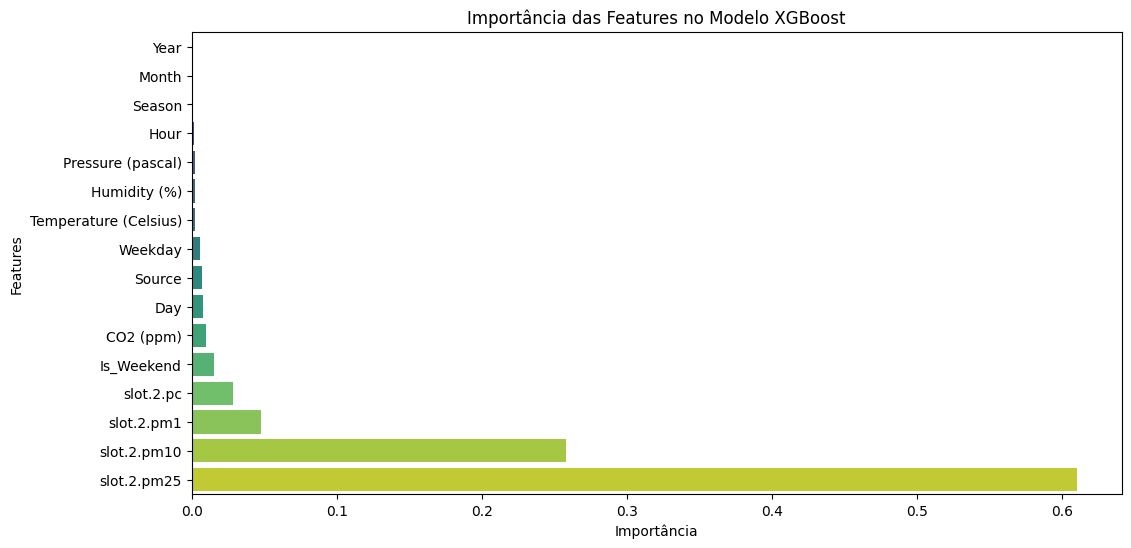

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import xgboost as xgb

# Treina o modelo XGBoost com os melhores hiperpar√¢metros encontrados
model = xgb.XGBRegressor(
    n_estimators=300, 
    learning_rate=0.05, 
    max_depth=5, 
    subsample=1.0, 
    colsample_bytree=0.8,
    objective='reg:squarederror',
    random_state=42
)

model.fit(X, y)  # Treina o modelo

# Obt√©m a import√¢ncia das features
importancia_features = pd.DataFrame({
    'Feature': X.columns,
    'Import√¢ncia': model.feature_importances_
}).sort_values(by='Import√¢ncia', ascending=True)  # Ordena de forma crescente para visualiza√ß√£o

# Plot do gr√°fico de import√¢ncia das features
plt.figure(figsize=(12, 6))
sns.barplot(x='Import√¢ncia', y='Feature', data=importancia_features, palette='viridis')
plt.title('Import√¢ncia das Features no Modelo XGBoost')
plt.xlabel('Import√¢ncia')
plt.ylabel('Features')
plt.show()


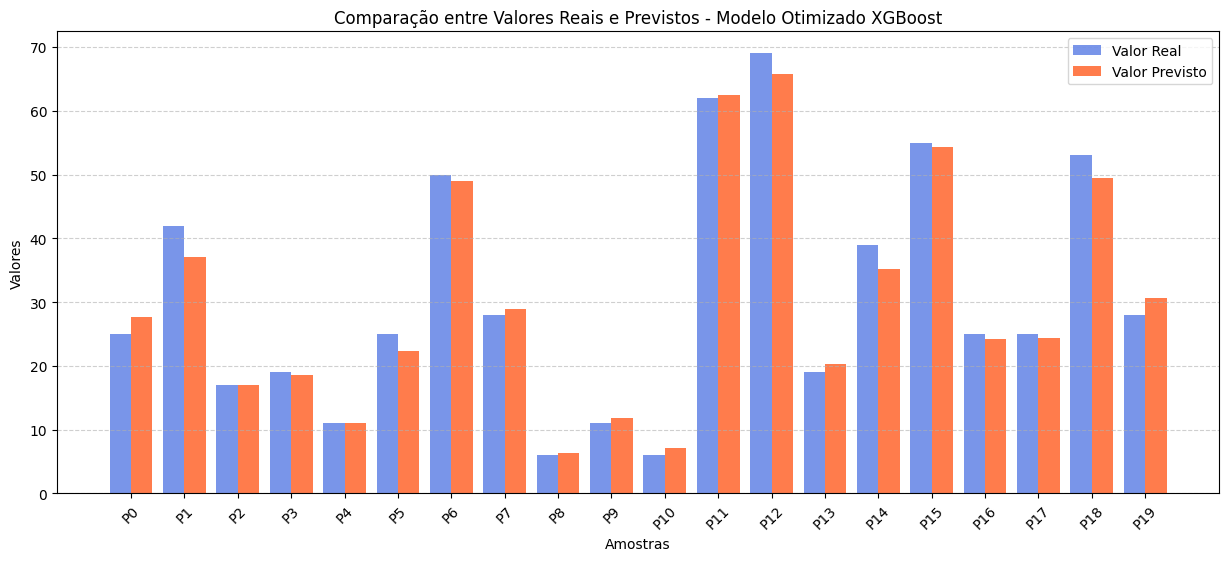

In [57]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Definir n√∫mero de amostras para visualiza√ß√£o
n_amostra = 20  # Pode ser ajustado conforme necess√°rio
y_test_amostra = y_test[:n_amostra]
y_pred_amostra = y_pred[:n_amostra]  # Usa as previs√µes do modelo otimizado

# Criar √≠ndices para os valores
indices = np.arange(len(y_test_amostra))

plt.figure(figsize=(15, 6))

# Plotando os valores reais e previstos lado a lado
plt.bar(indices - 0.2, y_test_amostra, width=0.4, label='Valor Real', color='royalblue', alpha=0.7)
plt.bar(indices + 0.2, y_pred_amostra, width=0.4, label='Valor Previsto', color='orangered', alpha=0.7)

# Melhorando a visualiza√ß√£o
plt.xticks(indices, labels=[f'P{i}' for i in indices], rotation=45)  # Define r√≥tulos inclinados
plt.ylabel('Valores')
plt.xlabel('Amostras')
plt.title('Compara√ß√£o entre Valores Reais e Previstos - Modelo Otimizado XGBoost')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()


# LightGBM

In [58]:
import lightgbm as lgb
from sklearn.model_selection import cross_val_score, cross_val_predict
import numpy as np

# Criar o modelo
model = lgb.LGBMRegressor(n_estimators=100, max_depth=-1, random_state=42)

# Obter previs√µes com valida√ß√£o cruzada
y_predict = cross_val_predict(model, X, y, cv=10)

# Calcular m√©tricas
r2_scores = cross_val_score(model, X, y, cv=10, scoring='r2')
mse_scores = cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')
mae_scores = cross_val_score(model, X, y, cv=10, scoring='neg_mean_absolute_error')

# Resultados
print(f"M√©dia do R¬≤: {np.mean(r2_scores):.4f}")
print(f"M√©dia do MSE: {-np.mean(mse_scores):.4f}")  # Inverte o sinal do MSE
print(f"M√©dia do MAE: {-np.mean(mae_scores):.4f}")  # Inverte o sinal do MAE


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005161 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1179
[LightGBM] [Info] Number of data points in the train set: 113609, number of used features: 13
[LightGBM] [Info] Start training from score 36.368492
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002202 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1176
[LightGBM] [Info] Number of data points in the train set: 113609, number of used features: 13
[LightGBM] [Info] Start training from score 36.670017
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGB

## Testando busca por hiperparametros

In [59]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import lightgbm as lgb

# Separar 80% treino e 20% teste antes de otimizar hiperpar√¢metros
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir o modelo
model = lgb.LGBMRegressor(objective='regression')

# Definir espa√ßo de busca dos hiperpar√¢metros
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [-1, 5, 10, 15],
    'num_leaves': [20, 31, 40, 50],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# RandomizedSearchCV com valida√ß√£o cruzada apenas no treino
random_search = RandomizedSearchCV(
    model,
    param_distributions=param_grid,
    n_iter=20,
    scoring='r2',
    cv=10,  # Valida√ß√£o cruzada apenas no conjunto de treino
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Executar a busca de hiperpar√¢metros apenas no conjunto de treino
random_search.fit(X_train, y_train)

# Melhor combina√ß√£o encontrada
best_params = random_search.best_params_
print("Melhores hiperpar√¢metros:", best_params)


Fitting 10 folds for each of 20 candidates, totalling 200 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004943 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1148
[LightGBM] [Info] Number of data points in the train set: 100986, number of used features: 13
[LightGBM] [Info] Start training from score 35.163547
Melhores hiperpar√¢metros: {'subsample': 1.0, 'num_leaves': 50, 'n_estimators': 200, 'max_depth': -1, 'learning_rate': 0.2, 'colsample_bytree': 1.0}


## Modelo otimizado

In [61]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Criar o modelo com os melhores hiperpar√¢metros encontrados
best_model = lgb.LGBMRegressor(
    subsample=1.0,
    num_leaves=50,
    n_estimators=200,
    max_depth=-1,
    learning_rate=0.2,
    colsample_bytree=1.0
)

# Treinar apenas no conjunto de treino
best_model.fit(X_train, y_train)

# Fazer previs√µes no conjunto de teste
y_pred = best_model.predict(X_test)

# Avaliar o modelo no conjunto de teste
r2_test = best_model.score(X_test, y_test)
mse_test = mean_squared_error(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)

# Exibir resultados
print(f"R¬≤ no conjunto de teste: {r2_test:.4f}")
print(f"MSE no conjunto de teste: {mse_test:.4f}")
print(f"MAE no conjunto de teste: {mae_test:.4f}")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005511 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1148
[LightGBM] [Info] Number of data points in the train set: 100986, number of used features: 13
[LightGBM] [Info] Start training from score 35.163547
R¬≤ no conjunto de teste: 0.9802
MSE no conjunto de teste: 7.1484
MAE no conjunto de teste: 1.6850


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006583 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1179
[LightGBM] [Info] Number of data points in the train set: 126233, number of used features: 13
[LightGBM] [Info] Start training from score 35.192359


C:\Users\victo\AppData\Local\Temp\ipykernel_19252\1738408003.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Import√¢ncia', y='Feature', data=importancia_features, palette='viridis')


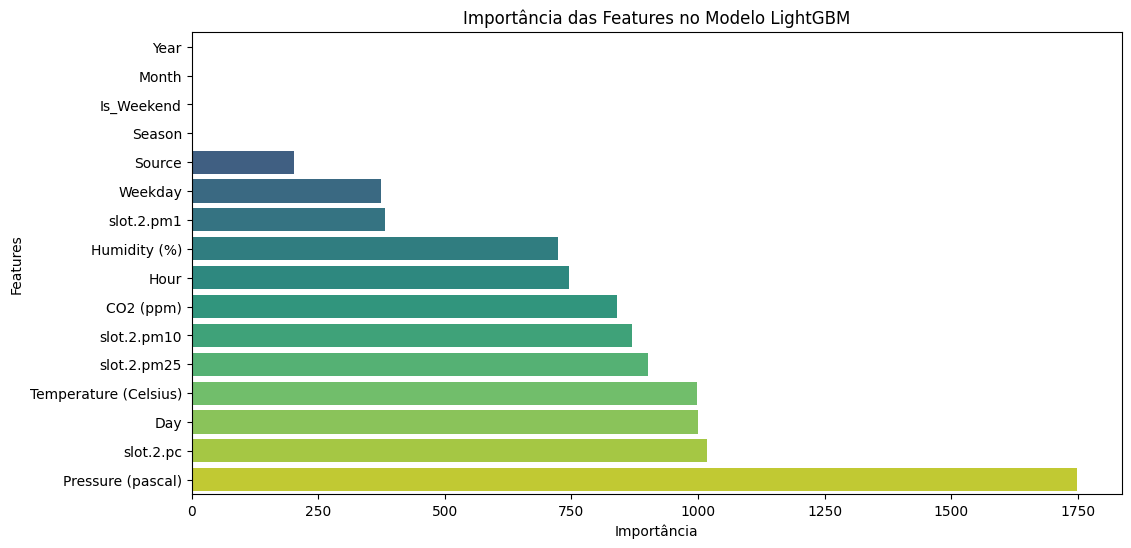

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import lightgbm as lgb

# Treina o modelo LightGBM com os melhores hiperpar√¢metros encontrados
model = lgb.LGBMRegressor(
    subsample=1.0,
    num_leaves=50,
    n_estimators=200,
    max_depth=-1,
    learning_rate=0.2,
    colsample_bytree=1.0
)

model.fit(X, y)  # Treina o modelo

# Obt√©m a import√¢ncia das features
importancia_features = pd.DataFrame({
    'Feature': X.columns,
    'Import√¢ncia': model.feature_importances_
}).sort_values(by='Import√¢ncia', ascending=True)  # Ordena de forma crescente para visualiza√ß√£o

# Plot do gr√°fico de import√¢ncia das features
plt.figure(figsize=(12, 6))
sns.barplot(x='Import√¢ncia', y='Feature', data=importancia_features, palette='viridis')
plt.title('Import√¢ncia das Features no Modelo LightGBM')
plt.xlabel('Import√¢ncia')
plt.ylabel('Features')
plt.show()


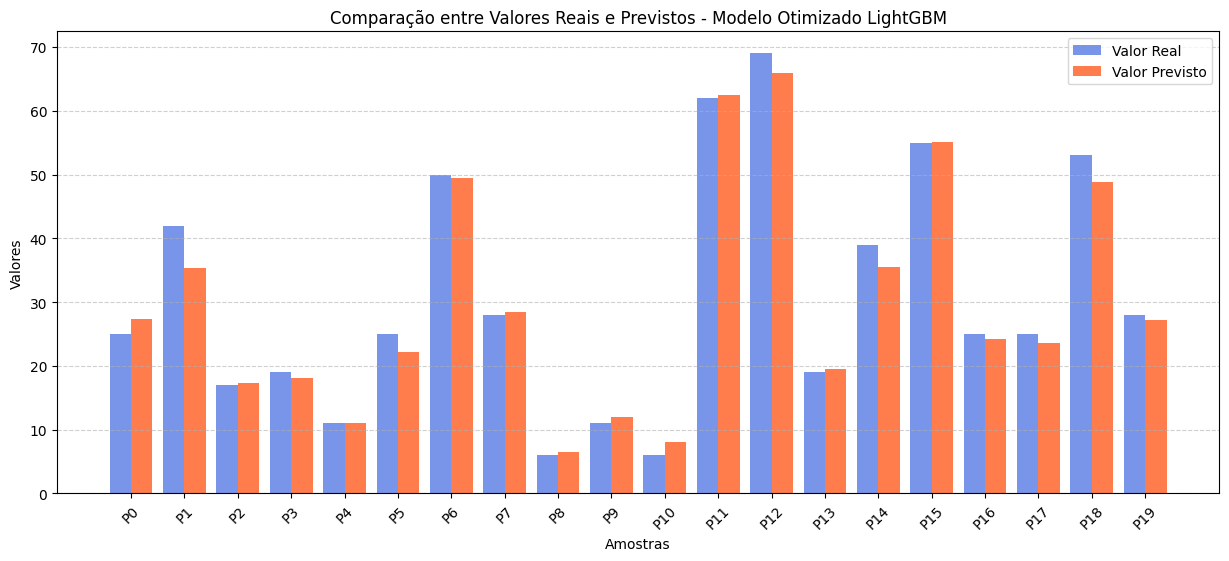

In [64]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Definir n√∫mero de amostras para visualiza√ß√£o
n_amostra = 20  
y_test_amostra = y_test[:n_amostra]
y_pred_amostra = best_model.predict(X_test[:n_amostra])  # Previs√µes do modelo otimizado LightGBM

# Criar √≠ndices para os valores
indices = np.arange(len(y_test_amostra))

plt.figure(figsize=(15, 6))

# Plotando os valores reais e previstos lado a lado
plt.bar(indices - 0.2, y_test_amostra, width=0.4, label='Valor Real', color='royalblue', alpha=0.7)
plt.bar(indices + 0.2, y_pred_amostra, width=0.4, label='Valor Previsto', color='orangered', alpha=0.7)

# Melhorando a visualiza√ß√£o
plt.xticks(indices, labels=[f'P{i}' for i in indices], rotation=45)  # Define r√≥tulos inclinados
plt.ylabel('Valores')
plt.xlabel('Amostras')
plt.title('Compara√ß√£o entre Valores Reais e Previstos - Modelo Otimizado LightGBM')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()


# Explica√ß√£o da estrat√©gia
* Valida√ß√£o cruzada no in√≠cio ‚Üí Avaliar modelo sem ajuste.

* Train-Test Split ‚Üí Guardar 20% dos dados para um teste final independente.

* Valida√ß√£o cruzada dentro do RandomizedSearchCV ‚Üí Encontrar os melhores hiperpar√¢metros de forma confi√°vel.

* Teste final no conjunto de teste ‚Üí Avaliar o modelo otimizado em dados nunca vistos.

* Essa estrat√©gia evita overfitting, garante um modelo bem generalizado e reflete o desempenho real do modelo em novos dados. 

# MLP

In [ ]:
'''import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados de entrada
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Converter para tensores
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values.reshape(-1, 1), dtype=torch.float32)

X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values.reshape(-1, 1), dtype=torch.float32)

# Criar DataLoader para treino
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

# Definir a rede MLP
class MLPRegressor(nn.Module):
    def __init__(self, input_dim):
        super(MLPRegressor, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        return self.fc4(x)

# Inicializar modelo
input_dim = X.shape[1]
modelo = MLPRegressor(input_dim)
criterio = nn.MSELoss()
otimizador = optim.Adam(modelo.parameters(), lr=0.001)

# Treinar o modelo
num_epochs = 50
for epoch in range(num_epochs):
    modelo.train()
    perda_total = 0
    for batch_X, batch_y in train_loader:
        saida = modelo(batch_X)
        perda = criterio(saida, batch_y)

        otimizador.zero_grad()
        perda.backward()
        otimizador.step()

        perda_total += perda.item()

    print(f'√âpoca {epoch+1}/{num_epochs}, Perda: {perda_total / len(train_loader):.4f}')

# Avalia√ß√£o no conjunto de teste
modelo.eval()
with torch.no_grad():
    y_pred = modelo(X_test_tensor).numpy()
    y_true = y_test_tensor.numpy()

# M√©tricas
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f"\n--- Avalia√ß√£o no Teste ---")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R¬≤: {r2:.4f}")
'''

√âpoca 1/50, Perda: 40.0822
√âpoca 2/50, Perda: 14.6416
√âpoca 3/50, Perda: 12.8190
√âpoca 4/50, Perda: 12.7713
√âpoca 5/50, Perda: 11.1745
√âpoca 6/50, Perda: 10.3528
√âpoca 7/50, Perda: 10.2776
√âpoca 8/50, Perda: 10.2523
√âpoca 9/50, Perda: 9.8146
√âpoca 10/50, Perda: 9.7457
√âpoca 11/50, Perda: 9.2363
√âpoca 12/50, Perda: 9.0381
√âpoca 13/50, Perda: 9.2040
√âpoca 14/50, Perda: 9.2053
√âpoca 15/50, Perda: 8.9998
√âpoca 16/50, Perda: 8.5745
√âpoca 17/50, Perda: 8.8706
√âpoca 18/50, Perda: 8.4493
√âpoca 19/50, Perda: 8.9650
√âpoca 20/50, Perda: 8.2338
√âpoca 21/50, Perda: 8.5955
√âpoca 22/50, Perda: 8.4129
√âpoca 23/50, Perda: 8.4979
√âpoca 24/50, Perda: 8.2127
√âpoca 25/50, Perda: 8.0352
√âpoca 26/50, Perda: 8.0734
√âpoca 27/50, Perda: 7.8512
√âpoca 28/50, Perda: 7.8581
√âpoca 29/50, Perda: 8.1567
√âpoca 30/50, Perda: 7.8311
√âpoca 31/50, Perda: 7.9815
√âpoca 32/50, Perda: 7.8783
√âpoca 33/50, Perda: 7.7474
√âpoca 34/50, Perda: 7.8758
√âpoca 35/50, Perda: 7.8371
√âpoca 36/50, Perda: 

In [28]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, Subset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Normalizar X
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y.values.reshape(-1, 1), dtype=torch.float32)

# Dataset completo
dataset = TensorDataset(X_tensor, y_tensor)

# K-Fold config
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Armazenar m√©tricas de cada fold
maes, mses, r2s = [], [], []

# Modelo MLP
class MLPRegressor(nn.Module):
    def __init__(self, input_dim):
        super(MLPRegressor, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        return self.fc4(x)

# Treinamento com valida√ß√£o cruzada
for fold, (train_idx, val_idx) in enumerate(kf.split(dataset)):
    print(f"\nüîÅ Fold {fold+1}/{k}")
    
    # Subsets de treino e valida√ß√£o
    train_subset = Subset(dataset, train_idx)
    val_subset = Subset(dataset, val_idx)

    train_loader = DataLoader(train_subset, batch_size=16, shuffle=True)
    val_loader = DataLoader(val_subset, batch_size=16, shuffle=False)

    # Novo modelo pra cada fold
    model = MLPRegressor(X.shape[1])
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Treinamento
    for epoch in range(50):
        model.train()
        for batch_X, batch_y in train_loader:
            output = model(batch_X)
            loss = criterion(output, batch_y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    # Avalia√ß√£o no fold
    model.eval()
    with torch.no_grad():
        preds = []
        targets = []
        for batch_X, batch_y in val_loader:
            output = model(batch_X)
            preds.append(output.numpy())
            targets.append(batch_y.numpy())

        preds = np.vstack(preds)
        targets = np.vstack(targets)

        mae = mean_absolute_error(targets, preds)
        mse = mean_squared_error(targets, preds)
        r2 = r2_score(targets, preds)

        maes.append(mae)
        mses.append(mse)
        r2s.append(r2)

        print(f"MAE: {mae:.2f} | MSE: {mse:.2f} | R¬≤: {r2:.4f}")

# Resultados m√©dios
print("\n Resultados M√©dios:")
print(f"MAE m√©dio: {np.mean(maes):.2f}")
print(f"MSE m√©dio: {np.mean(mses):.2f}")
print(f"R¬≤ m√©dio:  {np.mean(r2s):.4f}")



üîÅ Fold 1/5
MAE: 1.91 | MSE: 9.59 | R¬≤: 0.9734

üîÅ Fold 2/5
MAE: 1.87 | MSE: 7.31 | R¬≤: 0.9790

üîÅ Fold 3/5
MAE: 1.86 | MSE: 7.64 | R¬≤: 0.9798

üîÅ Fold 4/5
MAE: 1.80 | MSE: 7.06 | R¬≤: 0.9792

üîÅ Fold 5/5
MAE: 2.34 | MSE: 10.72 | R¬≤: 0.9691

 Resultados M√©dios:
MAE m√©dio: 1.96
MSE m√©dio: 8.46
R¬≤ m√©dio:  0.9761


C:\Users\victo\AppData\Local\Temp\ipykernel_10976\883297231.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Import√¢ncia', y='Feature', data=importancia_mlp, palette='viridis')


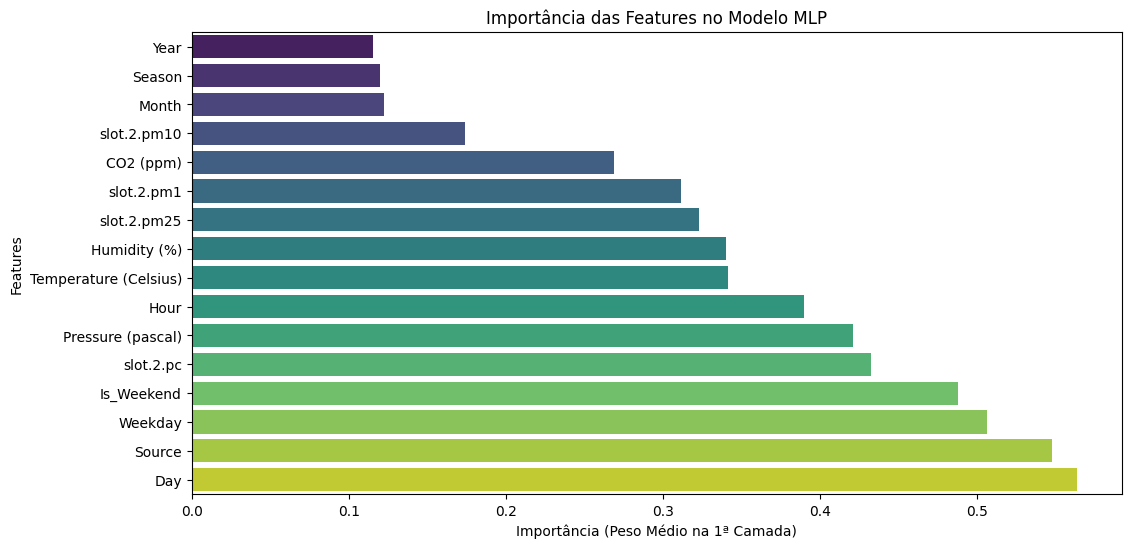

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Extrai os pesos absolutos da primeira camada
with torch.no_grad():
    first_layer_weights = model.fc1.weight.abs().mean(dim=0).numpy()

# Cria DataFrame com nomes das features e seus pesos
importancia_mlp = pd.DataFrame({
    'Feature': X.columns,
    'Import√¢ncia': first_layer_weights
}).sort_values(by='Import√¢ncia', ascending=True)

# Plot com mesmo estilo do gr√°fico do LightGBM
plt.figure(figsize=(12, 6))
sns.barplot(x='Import√¢ncia', y='Feature', data=importancia_mlp, palette='viridis')
plt.title('Import√¢ncia das Features no Modelo MLP')
plt.xlabel('Import√¢ncia (Peso M√©dio na 1¬™ Camada)')
plt.ylabel('Features')
plt.show()
